# Projeto 3: Algoritmos de Machine Learning


*Aluno: Romulo Barros de Freitas* <br>
*Matrícula: 521353*

## Agrupamento (Clustering) 

## K- Means

É um método de aprendizado não supervisionado que particiona objetos de dados em k-grupos onde cada observação pertence ao grupo mais próximo da média (centróides).

<img src = "image.gif" width="300" height="200">

Objetiva-se, com a aplicação do algoritimo, agrupar os municipios do estado do Ceará, levando em consideração as seguintes variáveis: Densidade Demográfica, Taxa de Escolarização, Índice de Desenvolvimento Humano Municipal (IDHM), Taxa de Mortalidade Infantil, Receitas Realizadas, Despesas Empenhadas e Produto Interno Bruto (PIB).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Projeto-3:-Algoritmos-de-Machine-Learning" data-toc-modified-id="Projeto-3:-Algoritmos-de-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Projeto 3: Algoritmos de Machine Learning</a></span><ul class="toc-item"><li><span><a href="#Agrupamento-(Clustering)" data-toc-modified-id="Agrupamento-(Clustering)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Agrupamento (Clustering)</a></span></li><li><span><a href="#K--Means" data-toc-modified-id="K--Means-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>K- Means</a></span></li><li><span><a href="#Etapas" data-toc-modified-id="Etapas-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Etapas</a></span><ul class="toc-item"><li><span><a href="#1.-Dimensionar-os-Dados" data-toc-modified-id="1.-Dimensionar-os-Dados-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>1. Dimensionar os Dados</a></span></li><li><span><a href="#Plotando-Davies-Bouldin-score" data-toc-modified-id="Plotando-Davies-Bouldin-score-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Plotando Davies-Bouldin score</a></span></li><li><span><a href="#2.-Iniciar-centróides-aleatórios" data-toc-modified-id="2.-Iniciar-centróides-aleatórios-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>2. Iniciar centróides aleatórios</a></span></li><li><span><a href="#3.-Rotular-cada-ponto-com-base-na-distância-para-o-centróide" data-toc-modified-id="3.-Rotular-cada-ponto-com-base-na-distância-para-o-centróide-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>3. Rotular cada ponto com base na distância para o centróide</a></span></li><li><span><a href="#4.-Atualizar-os-centróides" data-toc-modified-id="4.-Atualizar-os-centróides-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>4. Atualizar os centróides</a></span></li><li><span><a href="#5.-Repetir-etapas-3-e-4-até-que-os-centróides-se-estabilizem" data-toc-modified-id="5.-Repetir-etapas-3-e-4-até-que-os-centróides-se-estabilizem-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>5. Repetir etapas 3 e 4 até que os centróides se estabilizem</a></span></li></ul></li><li><span><a href="#fazendo-diretamente-por-meio-do-sklearn" data-toc-modified-id="fazendo-diretamente-por-meio-do-sklearn-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>fazendo diretamente por meio do sklearn</a></span></li></ul></li><li><span><a href="#Tópico-Extra" data-toc-modified-id="Tópico-Extra-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tópico Extra</a></span></li></ul></div>

In [71]:
# Bibliotecas que serão utilizadas no trabalho

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb

%matplotlib inline

In [72]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [73]:
# Dataframe utilizado
municipios = pd.read_csv('DF_Cidades.csv')

In [74]:
municipios.head()

,codigo,cidade,prefeito,gentilico,area_territorial,populacao_estimada,densidade_demografica,escolarizacao,idhm,mortalidade_infantil,receitas_realizadas,despesas_empenhadas,pib
0,2300101,Abaiara,AFONSO TAVARES LEITE,abaiarense,180.833,11965,58.69,96.7,0.628,19.87,29043.96,26827.90,9158.04
1,2300150,Acarape,FRANCISCO EDILBERTO BESERRA BARROSO,acarapense,130.002,15140,98.52,96.8,0.606,5.35,38762.54,36800.47,10317.47
2,2300200,Acaraú,ANA FLÁVIA RIBEIRO MONTEIRO,acarauense,842.471,63556,68.31,96.8,0.601,5.92,132656.39,109899.30,13261.89
3,2300309,Acopiara,ANTÔNIO ALMEIDA NETO,acopiarense,2254.279,54687,22.58,97.2,0.595,20.18,153148.71,125356.17,9432.25
4,2300408,Aiuaba,RAMILSON ARAUJO MORAES,aiuabense,2438.563,17584,6.66,97.5,0.569,15.08,37794.63,33776.93,8642.90


In [78]:
# Selecionando as colunas que serão utilizadas no agrupamento
features = ['densidade_demografica', 'escolarizacao', 'idhm', 'mortalidade_infantil', 'receitas_realizadas', 'despesas_empenhadas', 'pib']

In [79]:
# Excluindo os valores nulos das variáveis selecionadas
municipios = municipios.dropna(subset=features)

In [80]:
# criando o dataframe com as colunas que serão utilizadas para fazer o agrupamento
df = municipios[features].copy()

In [81]:
df

,densidade_demografica,escolarizacao,idhm,mortalidade_infantil,receitas_realizadas,despesas_empenhadas,pib
0,58.69,96.7,0.628,19.87,29043.96,26827.90,9158.04
1,98.52,96.8,0.606,5.35,38762.54,36800.47,10317.47
2,68.31,96.8,0.601,5.92,132656.39,109899.30,13261.89
3,22.58,97.2,0.595,20.18,153148.71,125356.17,9432.25
4,6.66,97.5,0.569,15.08,37794.63,33776.93,8642.90
...,...,...,...,...,...,...,...
177,203.61,95.9,0.639,14.16,46252.58,42868.59,12349.85
178,18.49,97.7,0.566,18.52,36175.66,34549.31,13874.25
179,98.07,96.6,0.611,7.41,51275.61,47814.73,19390.59
180,45.99,97.0,0.629,10.68,79368.16,71300.30,10609.61


## Etapas 

1. Dimensionar os dados
2. Iniciar centróides aleatórios
3. Rotular cada ponto com base na distância para o centróide
4. Atualizar os centróides
5. Repetir etapas 3 e 4 até que os centróides se estabilizem

### 1. Dimensionar os Dados

In [109]:
# Dimensionando os valores do novo dataframe
df = (df - df.min()) / (df.max() - df.min()) * 9 + 1

In [110]:
df.describe()

,densidade_demografica,escolarizacao,idhm,mortalidade_infantil,receitas_realizadas,despesas_empenhadas,pib
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,1.131079,7.135672,4.184566,4.073438,1.169573,1.140852,1.692612
std,0.716866,1.445865,1.356066,1.997359,0.697428,0.697423,0.971979
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.018128,6.400000,3.397196,2.659000,1.053145,1.027649,1.232174
50%,1.035284,7.300000,3.985981,3.550000,1.072529,1.047021,1.459045
75%,1.071111,8.071429,4.869159,5.200000,1.132268,1.097180,1.745980
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [111]:
df.head()

,densidade_demografica,escolarizacao,idhm,mortalidade_infantil,receitas_realizadas,despesas_empenhadas,pib
0,1.060191,6.400000,4.700935,6.178,1.038366,1.013860,1.288696
1,1.106268,6.528571,3.775701,1.822,1.051209,1.027649,1.424606
2,1.071319,6.528571,3.565421,1.993,1.175288,1.128725,1.769754
3,1.018417,7.042857,3.313084,6.271,1.202369,1.150098,1.320839
4,1.000000,7.428571,2.219626,4.741,1.049930,1.023468,1.228311


### Plotando Davies-Bouldin score

In [112]:
# Definindo o número total de clusters para fazer o agrupamento

def get_kmeans_score(data, center):
    
    kmeans = KMeans(n_clusters=center, init='k-means++')
    model = kmeans.fit_predict(df)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(df, model)
    
    return score

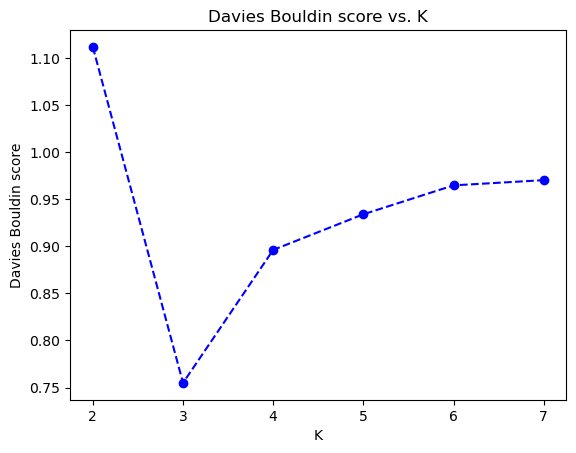

In [113]:
scores = []
centers = list(range(2,8))
for center in centers:
    scores.append(get_kmeans_score(df, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

De acordo com o Índice Davies-Bouldin score, devemos utilizar 3 clusters para a realização do agrupamento

### 2. Iniciar centróides aleatórios

In [114]:
def random_centroids(data, k_clusters):
    centroids = []
    for i in range(k_clusters):
        centroid = df.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis = 1)

In [115]:
centroids = random_centroids(df, 3)

In [116]:
centroids

,0,1,2
densidade_demografica,1.035284,1.106268,1.625946
escolarizacao,6.914286,8.457143,6.271429
idhm,3.397196,4.953271,4.196262
mortalidade_infantil,6.646000,3.502000,6.523000
receitas_realizadas,1.115745,1.050450,1.175288
despesas_empenhadas,1.020278,1.128725,1.042879
pib,1.224848,1.892798,1.030867


### 3. Rotular cada ponto com base na distância para o centróide

In [117]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((df - x) ** 2).sum(axis = 1)))
    return distances.idxmin(axis = 1)

In [118]:
labels = get_labels(df, centroids)

In [119]:
labels

0      2
1      1
2      1
3      0
4      0
      ..
177    2
178    0
179    1
180    1
181    1
Length: 169, dtype: int64

In [120]:
labels.value_counts()

1    111
0     36
2     22
dtype: int64

De acordo com a nossa clusterização, o cluster 0 englobou 36 municípios, o cluster 1 englobou 111 municípios e o cluster 2 englobou 22 municípios.

### 4. Atualizar os centróides

In [122]:
def new_centroids(data, labels, k_clusters):
    return df.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

### 5. Repetir etapas 3 e 4 até que os centróides se estabilizem

In [123]:
# Análise de componenentes principais
from sklearn.decomposition import PCA

# Plotagem de gráficos
import matplotlib.pyplot as plt

# Limpar a saída do jupyter notebook cada vez que criarmos um novo gráfico
from IPython.display import clear_output

In [124]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components = 2) # dados 2D
    df_2d = pca.fit_transform(df)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=df_2d[:,0], y=df_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

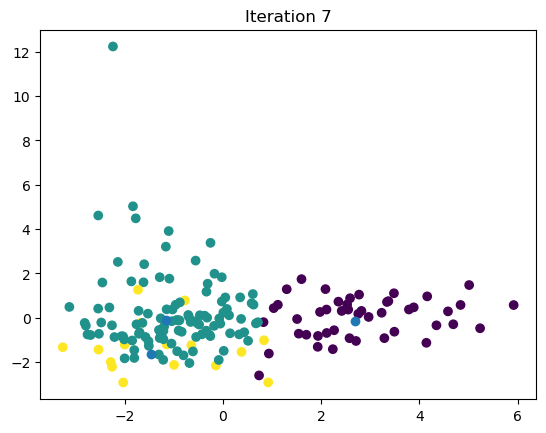

In [125]:
max_iterations = 100
k_clusters = 3

centrois = random_centroids(df, k_clusters)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(df, centroids)
    centroids = new_centroids(df, labels, k_clusters)
    plot_clusters(df, labels, centroids, iteration)
    iteration += 1

In [126]:
centroids

,0,1,2
densidade_demografica,1.040133,1.100332,1.079666
escolarizacao,7.351528,7.379319,3.795948
idhm,3.758194,4.184869,3.309861
mortalidade_infantil,6.712606,2.867474,2.863285
receitas_realizadas,1.069990,1.153702,1.095802
despesas_empenhadas,1.045592,1.123792,1.066779
pib,1.414088,1.684816,1.296690


In [55]:
# Municípios pertencentes ao cluster 0
municipios[labels == 0]

,codigo,cidade,prefeito,gentilico,area_territorial,populacao_estimada,densidade_demografica,escolarizacao,idhm,mortalidade_infantil,receitas_realizadas,despesas_empenhadas,pib
11,2301000,Aquiraz,BRUNO BARROS GONÇALVES,aquirazense,480.236,81581,150.50,96.5,0.641,14.23,244006.62,197501.40,42147.15
12,2301109,Aracati,BISMARCK COSTA LIMA PINHEIRO MAIA,aracatiense,1227.197,75392,56.32,98.5,0.655,9.33,227561.34,185621.26,19713.63
22,2301901,Barbalha,GUILHERME SAMPAIO SARAIVA,barbalhense,608.158,61662,97.14,98.3,0.683,6.26,243774.86,227251.72,19552.45
43,2303709,Caucaia,VITOR PEREIRA VALIM,caucaiense,1223.246,368918,264.91,96.3,0.682,12.88,629854.17,567292.53,19873.31
50,2304202,Crato,JOSÉ AILTON DE SOUSA BRASIL,cratense,1138.150,133913,103.21,97.8,0.713,10.00,263007.66,226354.59,12922.73
55,2304285,Eusébio,ACILON GONÇALVES PINTO JUNIOR,eusebiano,78.818,55035,582.66,98.3,0.701,9.17,281098.32,251597.09,58604.18
58,2304400,Fortaleza,JOSÉ SARTO NOGUEIRA MOREIRA,fortalezense,312.353,2703391,7786.44,96.1,0.754,12.02,6810527.07,6525657.82,24253.93
70,2305233,Horizonte,MANOEL GOMES DE FARIAS NETO,horizontino,160.557,69688,344.96,97.1,0.658,9.70,193783.18,175778.48,25074.33
81,2306009,Iracema,CELSO GOMES DA SILVA NETO,iracemense,839.174,14351,16.71,98.0,0.652,11.76,43144.92,43284.80,12240.15
83,2306207,Itaiçaba,FRANK GOMES FREITAS,itaiçabense,213.604,7904,34.49,99.5,0.656,10.99,24405.75,21829.32,9726.35


In [56]:
# Municípios pertencentes ao cluster 1
municipios[labels == 1]

,codigo,cidade,prefeito,gentilico,area_territorial,populacao_estimada,densidade_demografica,escolarizacao,idhm,mortalidade_infantil,receitas_realizadas,despesas_empenhadas,pib
6,2300606,Altaneira,FRANCISCO DARIOMAR RODRIGUES SOARES,altaneirense,72.675,7712,93.54,95.7,0.602,9.43,31688.03,24034.71,8560.21
9,2300804,Antonina do Norte,ANTONIO ROSENO FILHO,antonino ou antoninense,259.706,7402,26.85,95.7,0.599,11.11,21091.60,19508.59,9279.79
30,2302503,Brejo Santo,MARIA GISLAINE SANTANA SAMPAIO LANDIM,brejo-santense,654.658,50195,68.12,92.5,0.647,10.23,170601.24,147722.77,14200.26
41,2303600,Catarina,THIAGO PAES DE ANDRADE RODRIGUES,catarinense,488.153,21041,38.50,94.3,0.618,7.41,48412.86,40082.54,6695.21
62,2304707,Granja,JULIANA FROTA LOPES DE ALDIGUERI ARRUDA,granjense,2663.174,55170,19.52,94.7,0.559,6.37,107204.80,106091.79,7976.43
66,2304954,Guaiúba,IZABELLA MARIA FERNANDES DA SILVA,guaiubano,256.053,26508,90.19,94.2,0.617,3.24,55147.27,51599.00,8231.80
71,2305266,Ibaretama,ELIRIA MARIA FREITAS DE QUEIROZ,ibaretamense,879.255,13385,14.73,95.4,0.577,5.49,28682.81,28828.39,9285.37
82,2306108,Irauçuba,PATRÍCIA MARIA SANTOS BARRETO,irauçubense,1466.412,24450,15.28,95.2,0.605,16.44,57618.58,51199.17,7899.33
86,2306504,Itapiúna,FRANCISCO DÁRIO DE OLIVEIRA COELHO,itapiunense,593.231,20653,31.64,95.3,0.604,4.93,65456.74,45448.28,7944.20
102,2307700,Maranguape,ATILA CORDEIRO CAMARA,maranguapense,583.505,131677,192.19,94.9,0.659,12.08,197385.58,193904.07,11511.56


In [127]:
# Municípios pertencentes ao cluster 2
municipios[labels == 2]

,codigo,cidade,prefeito,gentilico,area_territorial,populacao_estimada,densidade_demografica,escolarizacao,idhm,mortalidade_infantil,receitas_realizadas,despesas_empenhadas,pib
6,2300606,Altaneira,FRANCISCO DARIOMAR RODRIGUES SOARES,altaneirense,72.675,7712,93.54,95.7,0.602,9.43,31688.03,24034.71,8560.21
9,2300804,Antonina do Norte,ANTONIO ROSENO FILHO,antonino ou antoninense,259.706,7402,26.85,95.7,0.599,11.11,21091.60,19508.59,9279.79
15,2301307,Araripe,CICERO FERREIRA DA SILVA,araripense,1097.339,21707,18.81,96.3,0.564,12.01,69217.32,59671.85,8762.18
30,2302503,Brejo Santo,MARIA GISLAINE SANTANA SAMPAIO LANDIM,brejo-santense,654.658,50195,68.12,92.5,0.647,10.23,170601.24,147722.77,14200.26
36,2303204,Caririaçu,JOSÉ EDMILSON LEITE BARBOSA,caririaçuense,634.179,27008,42.33,96.1,0.578,5.05,59523.76,55442.10,9186.37
41,2303600,Catarina,THIAGO PAES DE ANDRADE RODRIGUES,catarinense,488.153,21041,38.50,94.3,0.618,7.41,48412.86,40082.54,6695.21
61,2304608,General Sampaio,FRANCISCO CORDEIRO MOREIRA,sampaiense,230.371,7767,30.21,96.2,0.568,9.26,24583.98,25385.04,10022.93
62,2304707,Granja,JULIANA FROTA LOPES DE ALDIGUERI ARRUDA,granjense,2663.174,55170,19.52,94.7,0.559,6.37,107204.80,106091.79,7976.43
66,2304954,Guaiúba,IZABELLA MARIA FERNANDES DA SILVA,guaiubano,256.053,26508,90.19,94.2,0.617,3.24,55147.27,51599.00,8231.80
71,2305266,Ibaretama,ELIRIA MARIA FREITAS DE QUEIROZ,ibaretamense,879.255,13385,14.73,95.4,0.577,5.49,28682.81,28828.39,9285.37


## fazendo diretamente por meio do sklearn

In [101]:
from sklearn.cluster import KMeans

In [102]:
kmeans = KMeans(3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [103]:
centroids = kmeans.cluster_centers_

In [104]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
densidade_demografica,1.092903,1.040659,10.000000
escolarizacao,7.093861,7.275380,5.628571
idhm,4.231366,3.940346,10.000000
mortalidade_infantil,3.011438,6.812851,3.823000
receitas_realizadas,1.135009,1.070676,10.000000
despesas_empenhadas,1.104510,1.045923,10.000000
pib,1.779976,1.438642,3.058255


# Tópico Extra

In [133]:
new_df = np.array(df)

In [134]:
new_df

array([[1.06019065, 6.4       , 4.70093458, ..., 1.03836597, 1.01385969,
        1.28869597],
       [1.10626779, 6.52857143, 3.77570093, ..., 1.05120894, 1.02764908,
        1.42460578],
       [1.0713195 , 6.52857143, 3.56542056, ..., 1.17528833, 1.12872518,
        1.76975432],
       ...,
       [1.10574721, 6.27142857, 3.98598131, ..., 1.06774478, 1.04287885,
        2.48816808],
       [1.04549872, 6.78571429, 4.74299065, ..., 1.10486869, 1.0753531 ,
        1.45885079],
       [1.04076722, 6.65714286, 2.30373832, ..., 1.16652477, 1.12082808,
        1.18376655]])

In [135]:
kmeans = KMeans(n_clusters = 3, random_state = 0)

In [136]:
kmeans.fit(new_df)

KMeans(n_clusters=3, random_state=0)

In [137]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 2, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0,
       0, 1, 1, 0, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0,
       1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1])

In [138]:
df['k_classes'] = kmeans.labels_

In [139]:
df

,densidade_demografica,escolarizacao,idhm,mortalidade_infantil,receitas_realizadas,despesas_empenhadas,pib,k_classes
0,1.060191,6.400000,4.700935,6.178,1.038366,1.013860,1.288696,2
1,1.106268,6.528571,3.775701,1.822,1.051209,1.027649,1.424606,1
2,1.071319,6.528571,3.565421,1.993,1.175288,1.128725,1.769754,1
3,1.018417,7.042857,3.313084,6.271,1.202369,1.150098,1.320839,2
4,1.000000,7.428571,2.219626,4.741,1.049930,1.023468,1.228311,1
...,...,...,...,...,...,...,...,...
177,1.227841,5.371429,5.163551,4.465,1.061107,1.036040,1.662844,1
178,1.013685,7.685714,2.093458,5.773,1.047790,1.024536,1.841536,2
179,1.105747,6.271429,3.985981,2.440,1.067745,1.042879,2.488168,1
180,1.045499,6.785714,4.742991,3.421,1.104869,1.075353,1.458851,1


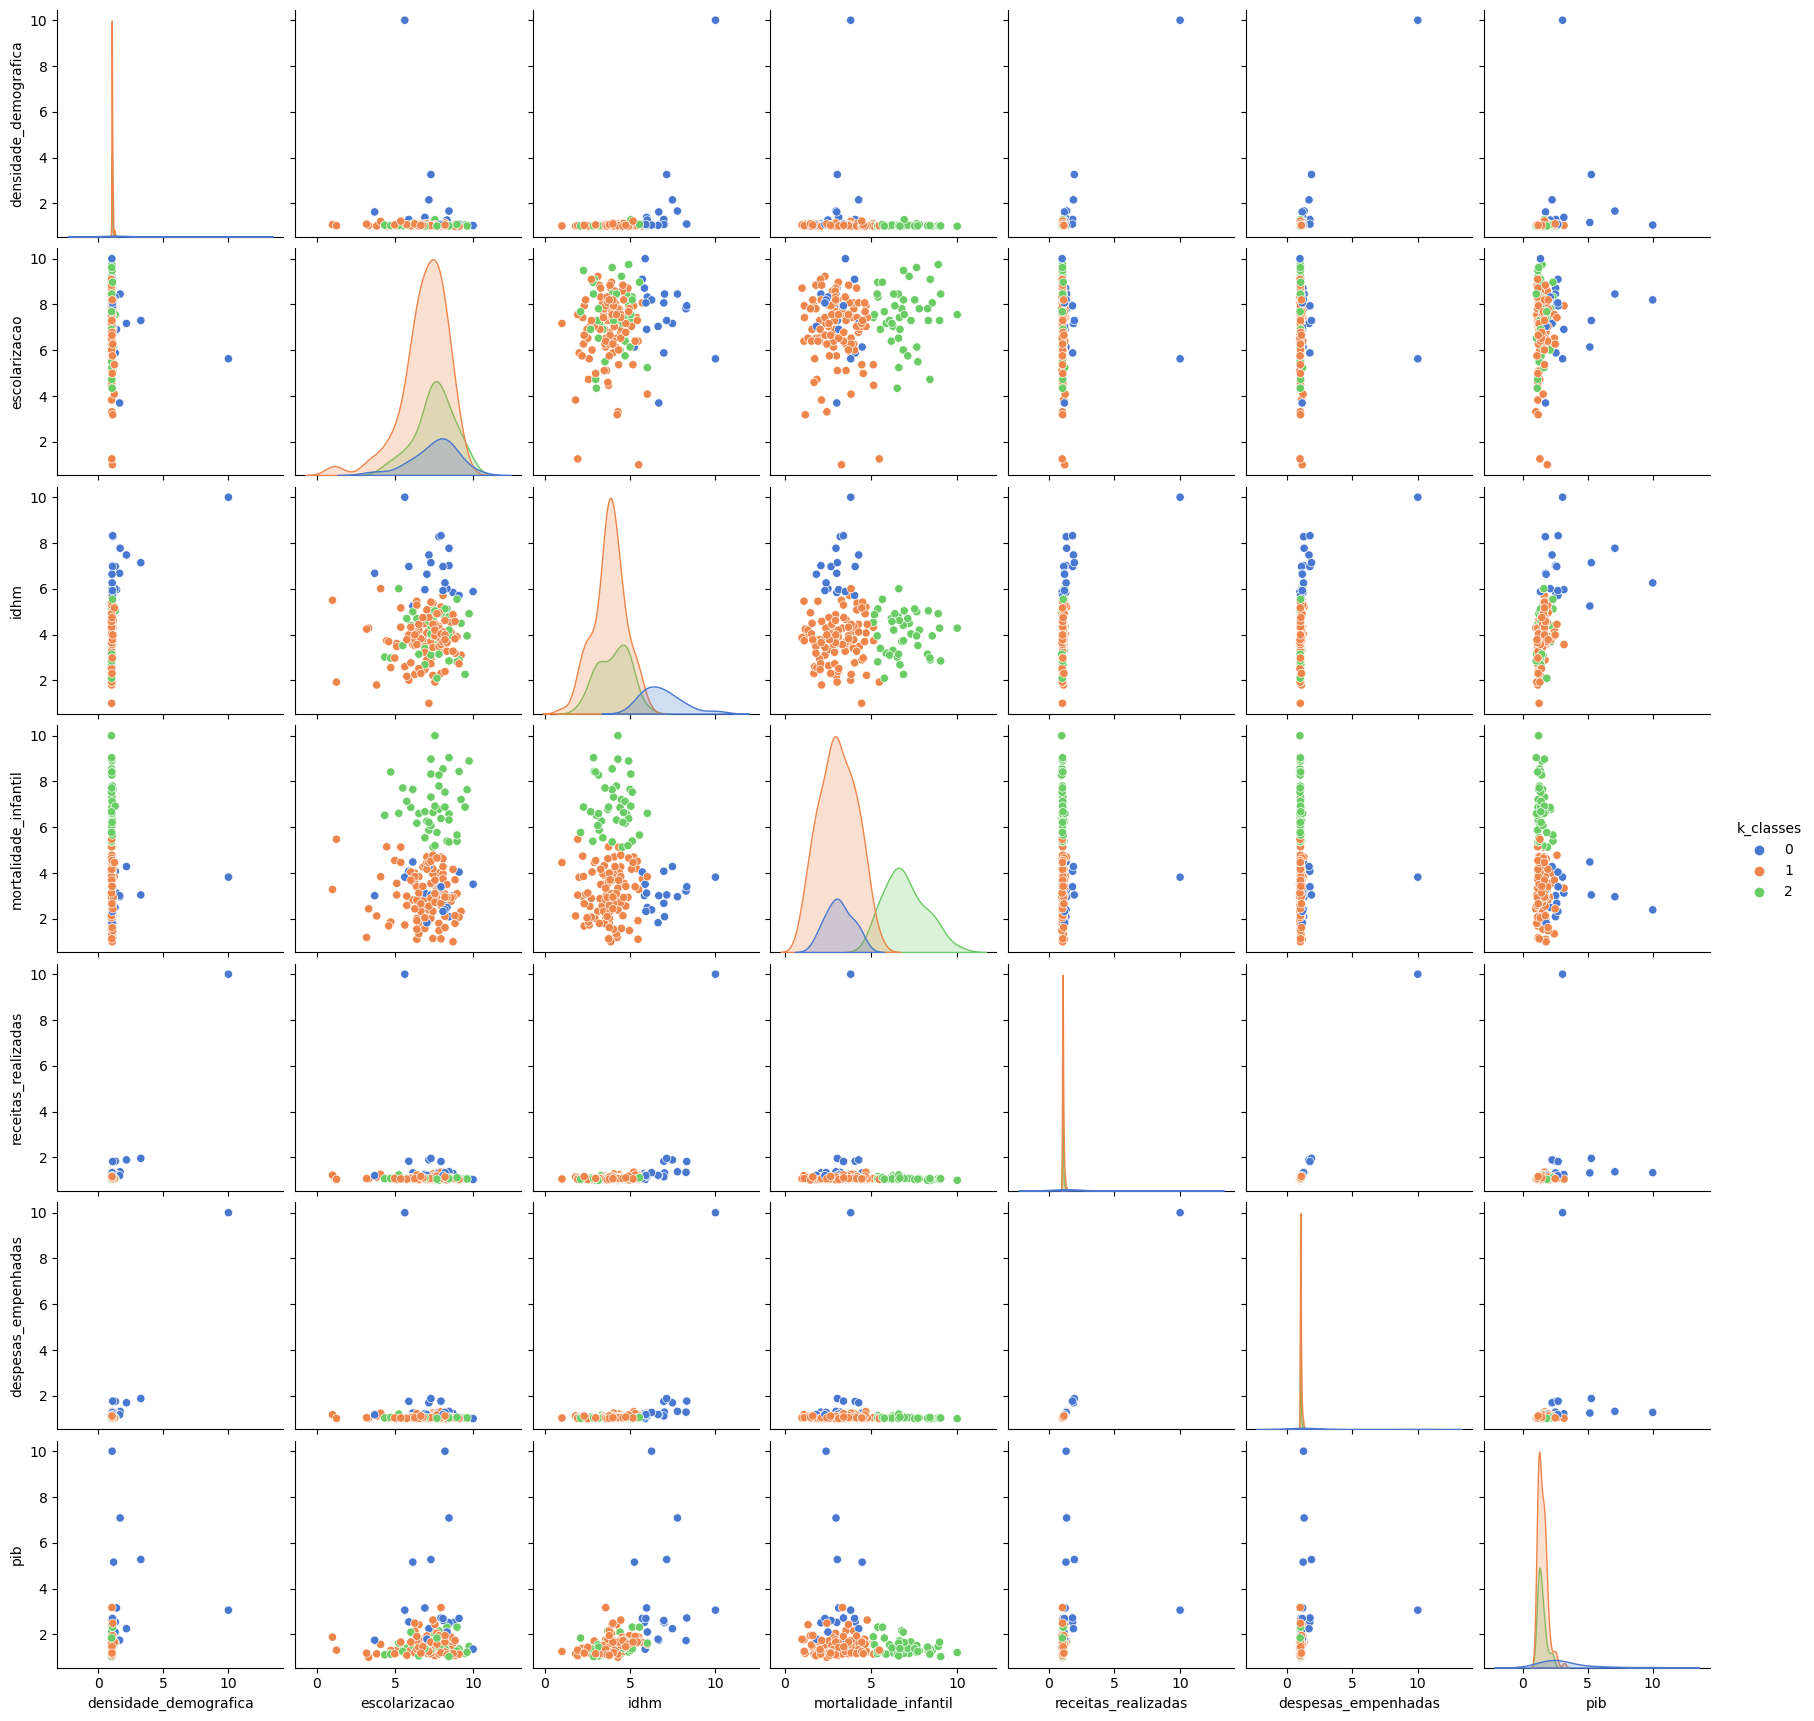

In [141]:
sb.pairplot(df, hue = 'k_classes', palette = 'muted')